# Multivariate analysis
If you read this good luck! You can do this. If the exam went horrible we can drink beer/wine after :D.

    

# Methods used in this course
Here are the methods that are used and a small introduction when they are used. the following chapters we go through each method and explain what it is when it is used and how to use it.
- single dataset as 1 group:
    - Principle component analysis(PCA)
    - Factor analysis
    - MDS
    - SGP
- single dataset with n groups:
    - Linear discriminant analysis
- 2 sets of data:
    - regression:
        - MultiLinear Regression (MLR)
        - Principle Component Regression(PCA + MLR)
        - Least Square Regression(LSR)

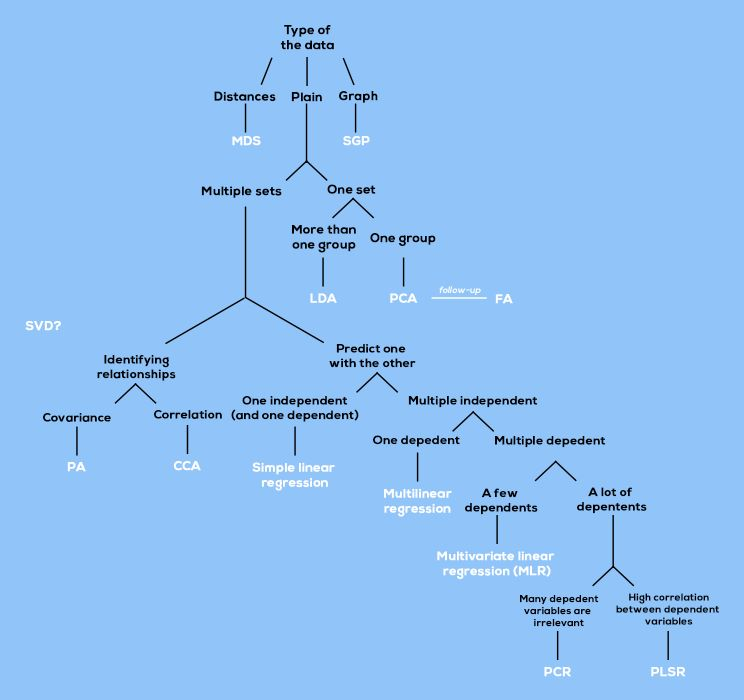
- __plain__ every variable(column) is unique
- The __independent variable__ is the cause. Its value is independent of other variables in your study
- The __dependent variable__ is the effect. Its value depends on changes in the independent variable.

## Principle component analysis (PCA)
### What is it?
A technique for analyzing large datasets containing a high number of dimensions/features per observation, increasing the interpretabillity of data while preserving the maximum amount of information, and enabling the visualization of multidimensional data. it is a method that describes the internal structure of a set of observations, with measurements in multiple variables. The observations in the dataset are the columns and the variables are the rows in the dataset. these variables are not wholly independent, and each pair of variables has a characteristic covariance and correlation.
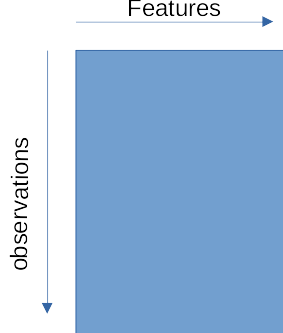




### When to use it?
use it on a plain data set. if it is not plain can you make it plane which can be done with vectorization or create an observation vector that has meaning

### How to use it?
- __step1__: Standardization
    - The aim of this step is to standardize teh range of the continuous intitial variables so that each one of them contributes equally to the analysis
    - the reason why it is critical to perform standardization prior to PCA, is that the latter is quite sensitive regarding the variance of the initial variables. that is, if there are large difference between the ranges of initial variables, those variables with larger ranges will dominates over those with small ranges(for example a variable that ranges between 0 and 100 will dominates over a variable that ranges between 0 and 1), which will lead to biased results. So, transforming the data to comparables scales can prevent this problem
    - Mathematically, this can be done by substracting the mean and dividing by the standard deviation for each value of each variable
    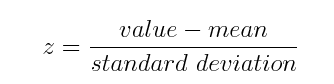
<br> 
<br>
- __step2__: Covariance matrix computation
    
    - The aim of this step is to understand how the variables of the input data set are varying from the mean with respect to each other, or in other words, to see if there is any relationship between them. Because sometimes, variables are highly correlated in such a way that they contain redundant information. So in order to identify these correlation we compute the __covariance matrix__.
    
    - The covariance matrix is a p x p symmetric matrix(where p is the number of dimensions) that has as entries the covariance associated with all possible pairs of the initial variables.
    
    - for example, for a 3-dimensional dataset with 3 variables x,y,z the covariance matrix is a 3x3 matrix of the form below.
    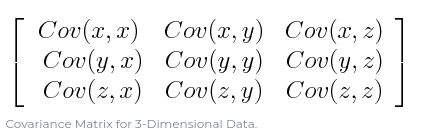
    
    - Since the covariance of a variable with itself is its variance (Cov(a,a) = Var(a)), in the main diagonal(Top left to bottom right) we actually have the variance of the initial variable. And since the covariance is commutative (Cov(a,b) = Cov(b,a)), the entries of the covariance matrix are symmetric with repsect to the main diagonal, which means that the upper and the lower triangular portions are equal
    
    - __what do the covariances that we have as entries of the matrix tell us about the correlations between the variables?__
        - It's actually the sign of the covariance that matters
        - if positive then: the two variables increase or decrease together(correlated) if negative then: one increase when the other decreases (Inversely correlated)
<br>
<br>

- __step3__: Compute the __eigenvectors__ and __eigenvalues__ of the covariance matrix to identify the principal components
    - We need the eigenvectors and eigenvalues to compute from the covariance matrix in order to determine the __principal components__ of the data.
    
    - Principle components are new variables that are constructed as linear combinations or mixtures of the initial variables. These combinations are done in such a way that the new variables(i.e., principal components) are uncorrelated and most of the information within the initial variable is sqeezed or compressed into the first components. The idea is 10-dimensional data gives you 10 principal components, but PCA tries to put maximum possible information in the first component, then maximum remaining information in the second and so on, until having something like shown in the scree plot below.
    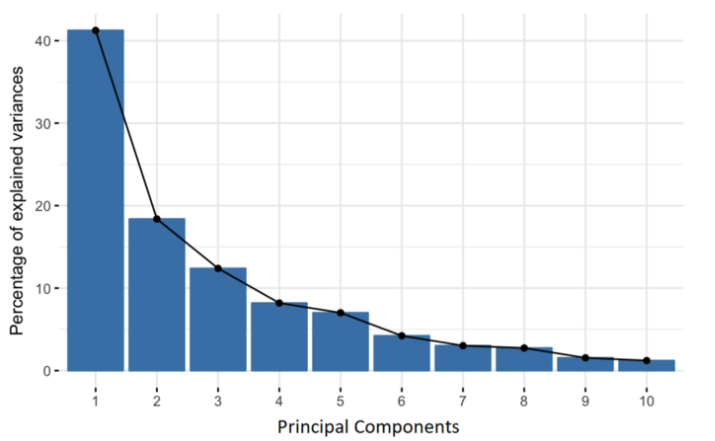
    
    - Organizing information in principal components this way, will allow you to reduce dimensionality without losing much information, and this by discarding the components with low information and considering the remaining components as your new variables.
    
    - __Note__ it is important to realize here that the principal components have no real meaning since they are constructed as linear combinations of the initial variables.
    
    - Geometrically speaking, principal components represent the directions of the data that explain a __maximal amount of variance__, thtat is to say, the lines that capture most information of the data. the relationship between variance and information here, is that, the larger the variance carried by a line, the larger the dispersion of the data points along it, and the larger dispersion along a line, the more infomration it has. Just thing of principal components as new axes that provide the best angle to see and evaluate the data so that the differences between observations are better visisble.
<br><br>
- __How PCA constructs the principal components__
    - there are as many principal components as there are varaibles in the dataset, principal components are constructed so that the first principal component accounts fo the __largest possible variance__ in the dataset. For example, lets assume that the scatter plot of out data set is as shown below. we can guess the first principal component by matching the line with the purple marks because it goes through the origin and it's the line which the projection of the red dots is the most spread out. _mathmatically speaking_, it's the line that maximizes the variance(the average of the squared distances from the projects red dots to the origin).
    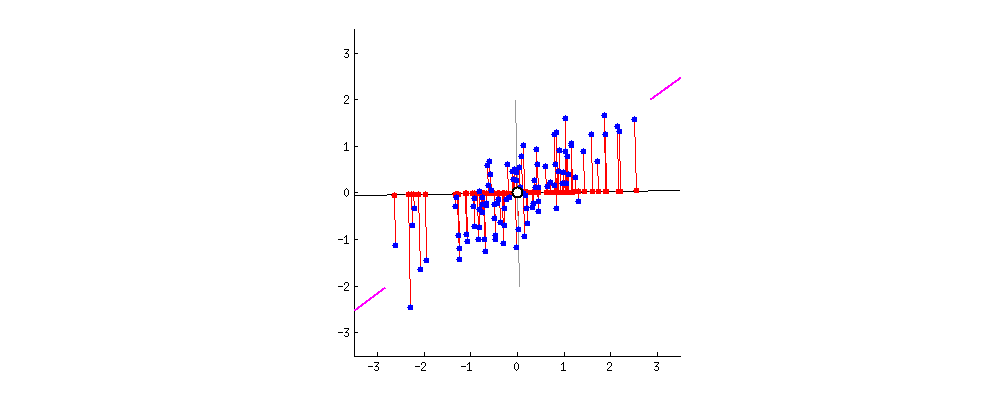
    - The second principal component is calculated in the same way, with the condition that it is uncorrelated with the first principal component and that it accounts for the next highest variance. this continues until a total of p principal components have been calculated, equal to the original number of variable
    - Every egenvector has an eigenvalue. their number is equal to the number if dimensions of the data. for example a 3-dimensional dataset has 3 variables and therefore there are 3 eigenvectors with 3 corresponding eigenvalues.
    - The eigenvectors of the covariance matrix are actually the _directions of the axes where there is the most variance_ (most information) and that we call __principle components__. eigenvalues are simply the coefficients attached to eigenvectors, which give the amount of varaicen varried in each principal component.
    - By ranking your eigenvectors in order of their eigenvalues, you get the principal components in order of significance.
    - __example__: a dataset that has 2 dimensions with 2 variables x,y and that the eigenvectors and eigenvalues of the covariance matrix are as follows:
    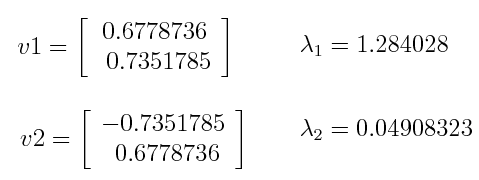
        - if we rank the eigenvalues in descending order we get λ1>λ2, which means that the eigenvector that corresponds to the first principal component(PC1) is v1 and the one that corresponds to the second principle component (PC2) is v2.
        - we divide the eigenvalue of each component by the sum of eigenvalues. if we apply this to the example above we find that pc1 carries 96 percent of the variance data and pc2 4 percent of the variance of the data
<br><br>
- __step4__ Feature vector:
    - In this step, what we do is, to choose whether to keep all these components or discard those of lesser significance (of low eigenvalues), and form with the remaining ones a matrix of vectors that we call _feature vector_.
    - making a feature vector is the first tep towards dimensionality reduction, because if we choose to only p eigenvectors(components) out of n, the final dataset will have only p dimensions
    - __example__: 
        - from the previous example we can choose to form a feature vector with both of the eigenvectors v1 and v2
    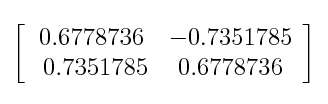
        - or discard the eigenvector v2, which is the one of lesser significance, and form a feature vector with only v1
        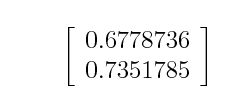
            - this will result in loss of information in the final data set. but given that v2 was carrying only 4 percent of the information, the loss will be therefor not important and we will still have 96 percent of the information that is carried by v1.
    - if you want to describe your data in terms of new variables(principal components) that are uncorrelated without seeking to reduce dimensionality, leaving out lesser significant components is not needed.
<br><br>
- __step5__ Recast the data along the pricipal components axes:
    - in this final step, the aim is to use the feature vector formed using the eigenvectors of the covariance matrix, to reorient the data from the original axes to the ones represented by the principal components. This can be done by multiplying the transpose of the original dataset by the transpose of the feature vector
    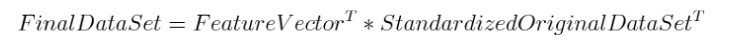

    

# Factor analysis
## What is it?
FA differs from PCA in that it assumes that the data and the covariances are the result of a small, typically known, number of underlying variables. The aim of FA is to identify the nature of these underlying variables. It is further assumed that each of these latent variables has a _simple structure_, which means that it is coupled to a limited number of the direct observable variables.

FA starts with performing PCA, followed by selection of a number of components that is assumed to span the _latent variable space_. these components are then rotated in the _variable space_, such that each component has a structure that is as simple as possible. a popular method for this is the _varimax_ rotation that maximizes the sum of variances over the rows of selected components. the resulting simple structures of the components make it typically more easy to interpret the results than is the case with PCA.

## When to use it?
When PCA is to hard to interpret.
## How to use it?

# MultiDimensional Scaling

## What is it?
MultiDimensional scaling transforms a data table of __distances__ (or dissimilarities) measured between a set of obsertvations into a set of(Euclidean) coordinates for these ovservations that can, in turn, be  used to plot the observations best approximate their distances in the original distances in the original distance matrix
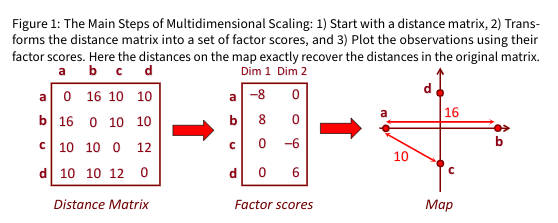


## When to use it?
Use this technique if you have a dataset of _distances_.

## How to use it?
### Definitions and notations
There are two variations:
- _metric multidimensional scaling(MMDS)_ to be used when the data are real distances
- non-metric multidimensional scaling(NMDS) when the data are simply dissimilarities
#### Distances
A distance noted _d_ associates to a pair of objects from a given set (which could be denoted {a,b,...}) a number such that
  - _d(a,b)_ >= (positivity)
  - _d(a,a)_ >= 0
  - _d(a,b)_ = _d(b,a)_ (symmetry)
  - _d(a,b)_ <= _d(a,c) + d(c,b)_ (triangle inequality)

when only the first three axioms hold _d_ is called dissimilarity. if two objects are the same, their distance can be defined as _d(a,a)_ >= 0, if they are different, their distance can be set to _d(a,b)_ = 1: using only these two numbers satisfies all four axioms of a distance.
<br><br>
Euclidean distances: in addition to the four axioms of a distance, euclidean distances exist in space for which the pythagorean theorem holds. in these spaces, the objects to be considered can be seen as points in a space whose position is specified by their coordinates. 
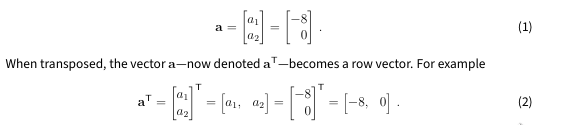
#### Euclidean distance
The squared Euclidean distance between two vectors is computed from the pythagorean theorem applied to the coordinates of the vectors.
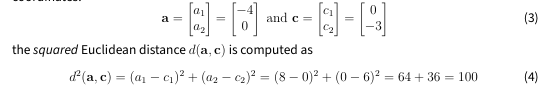
### Metric multidimensional scaling
MMDS analyzes data tables that store the distances between a set of observations. MMDS represents these observations as points on a map that are positioned to best approximate their distances in the original data table. To do so, MMDS transforms the original distance matrix into coordinates -akin to the facot scores of principal component analysis- which are then used to create these maps.
<br><br>
The basic idea of MMDS is to transform the original distance matrix into a cross-product matrix(a matrix kind to a covariance matrix) which is then decomposed with the eigendecomposition method; a process equivalent to PCS. just like PCA, MDS can be used to supplementary elements which are elements that are not used in the original distance matrix but are projected onto the MMDS dimensions after these dimensions have been computed.
#### eigen-analysis of a distance matrix
PCA is obtained by performing the eigen-decomposition of a matrix which can be a correlation matrix(variables to be analyzed are centered and normalized), a covariance matrix(variables to be analyzed are centered and normalized), or cross-product matrix(the variables are neither centered nor normalized). A distance matrix cannot be analyzed directly using the eigen-decomposition (because distance matrices are not positive semi definite matrices which are only type of matrices that can be analyzed with PCA), but it can be transformed into an equivalant cross-product matrix which can be analyzed with an eigen-decomposition.
#### Theory of MMDS: transforming a distance matrix into a cross-product matrix
we start from the fact that the scalar product between two vectors can easily be transformed into a distance.
<br>
This distance can be rwwritten in order to show the scalar product between vectors a and b:

where Atranspose b is the scalar between a and b.

<br><br>
Suppose now that we have a set of _I_ observations (i.e., vectors) each described by _J_ variables; and that these data are stored into an _I_ by _J_ data matrix denoted X, the between observations cross product matrix (denoted S) is then obtained as:
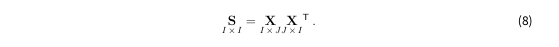
<br>
If we denote the _I_ by 1 vector of the diagonal elements of __S__ and by 1 s, a between observation squared euclidean distance matrix can be computed directly from the cross-product matrix as:
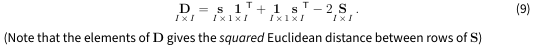
To perform MMDS the equation above needs to be "reverted" in order to obtain a cross-product matrix from a distance matrix. this can be done using the following steps
__first__ define a mass vector denoted __m__ whose _I_ elements give the mass of the _I_ rows of matrix D. These elements are all non-negative(positive or null) and their sum is euql to 1:
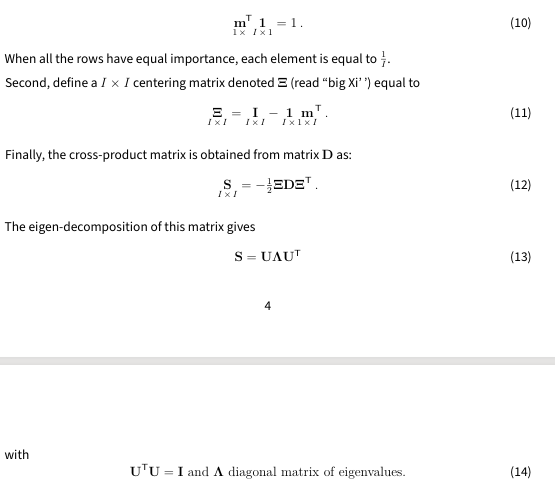
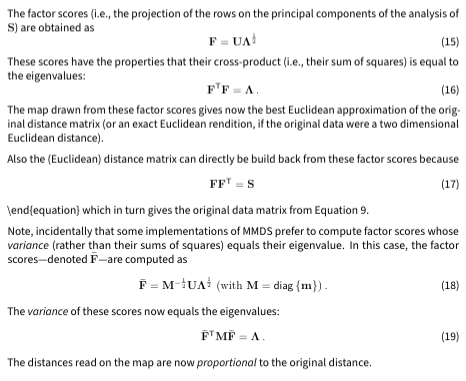
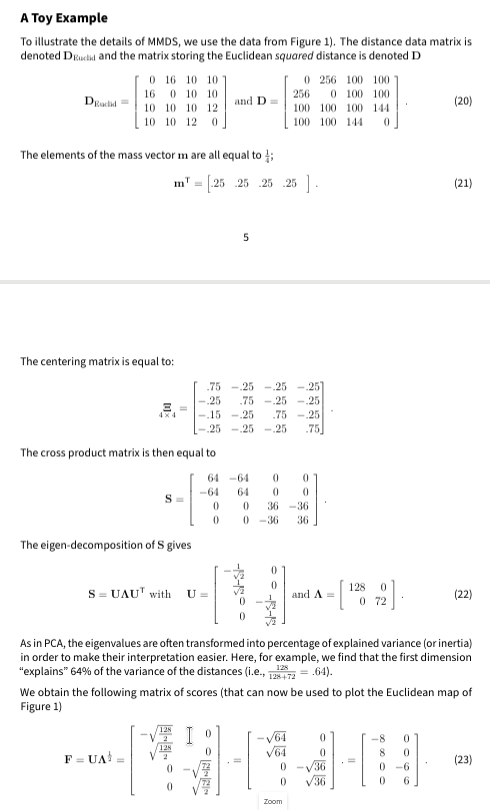

# Spectral graph partitioning
## What is it?
SGP is an application of PCA on a graph. for this, the graph is represented a a _Laplacian matrix_.
- a matrix that descirbes the structure of a graph
- it looks at how the nodes are connected to eachother and how info can flow through the network
Laplacian matrix is derived from the adjecency matrix
- L(laplacian) = D(Diagonal) - A(Adjecency)

which has a -1 for every connected nodes _i_ and _j_, and has the number of connections for each node on the diagonal. The eigenvectors of this matrix then represent a way of partitioning the graph in such a way that at every division the least connections are broken.
<br><br>
If the graph is not disjoint(i.e. consisting of more than one piece), the first eigen vector of this matrix is equal to 1/sqrt(n) *1
## When to use it?
When the data is a graph.
## How to use it?
maybe TODO ELSE LOOK IT UP ON THE INTERWEBS.

# Non-Negative Matrix Factorization
## What is it?
NNMF is a matrix factorization method where we constrain the matrices to be nonnegative. in order to understand NNMF, lets clarify the underlying intuition between matrix factorization.
<br>
For a matrix A of dimensions m x n, where each element >= 0, NNMF can factorize it into two matrices W and H having dimension m x k and k x n repsectively and these two matrices only contain non negative elements.
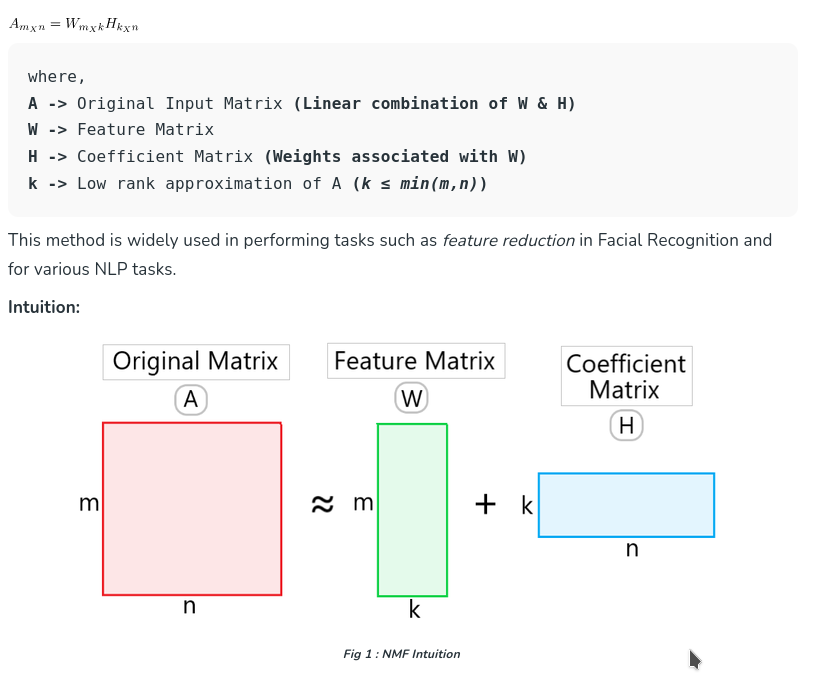
The objective of NNMF is dimensionality reduction and feature extraction. So, when we set lower dimension as k, the goal of NNMF is to find two matrices W ∈ Rm×k and H ∈ Rn×k having only nonnegative elements.
<br><br>

Therefor, by using NNMF we are able to obtain factorized matrices having significantly lower dimensions than those of the product matrix. Intuitively, NNMF assumes that the original input is made of a set of hidden features, represented by each column of W matrix and each column in H matrix represents the 'coordinates of a data point' in the matrix W. in simple terms, it contains the weights associated with matrix W. 
<br><br>
in this, each data point that is represented as a column in A, can be approximated by an additive combination of the non-negative vectors, which are represented as columns in W.
## When to use it?
Used in major applications such as image processing, text mining, spectral data analysis etc.
## How to use it?
- NNMF decomposes multivariate data by creating a user-defined number of features. each feature is a linear combination of the original atribute set; the coefficients of these linear combinations are non-negative.
- NNMF decomposes a data matrix V into the product of two lower ranked matrices W and H so that V is approximately equal to W times H.
- NMF uses an iterative procedure to modify the initial values of W and H so that the product approaches V. the procedure terminates when the approximation error converges or the specified number of iterations is reach.
- during model apply, an NNMF model maps maps the original data into the new set of attributes (feature) discovered by the model

# Linear Discriminant Analysis(LDA)
## What is it?
LDA finds the component that maximizes the separation of two groups X and Y in the data. if 𝐱¯ and 𝐲¯ are the respective means of the two groups and S is the pooled covariance matrix:
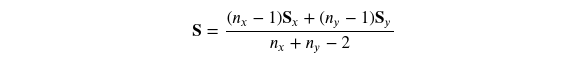
then LDA gives a single component __a__:
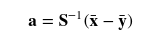
The scores of X and Y on a will have distributions with means and variances such that a t-test will give the maximum possible (squared) critical value.
<br><br>
It is posible to deflate the data to remove the projection onto the LDA component. A subsequent PCA on the deflated data gives the principal directions of variance that are orthogonal to the direction of maximum discrimination. plotting the projection on the discriminating axis and on the first PC of the deflated data then allows comparing the variance contributions associated with either directions and so assess the significance of the separation. A caveat of LDA is that the difference found to be most significant may be in directions that are themselves not very relevant in terms of data spread.
## When to use it?
This method can be used when you have multiple groups in your dataset.
## How to use it?
for this the example in the MCA notebook will be used which is the wine dataset
### step 1: devide your data
white = np.array(wine[wine.Type == 'W'].values[:, 1:12], dtype=float)
red = np.array(wine[wine.Type == 'R'].values[:, 1:12], dtype=float)
### step2: calculated the mean and the covariance
mw = white.mean(axis=0)
mr = red.mean(axis=0)

nw = white.shape[0]
nr = red.shape[0]

Sw = np.cov(white.T)
Sr = np.cov(red.T)
### step3: calculated the pooled covariance matrix
Sp = ((nr - 1) * Sr + (nw - 1) * Sw) / (nr + nw - 2)
### step4: project the data onto the discriminant axis
a = np.linalg.inv(Sp) @ (mw - mr)
a /= np.sqrt((a ** 2).sum())

tw = white @ a
tr = red @ a

### step5: deflate both groups, combine and plot the data

Ew = white - tw[:, None] * a[None, :]<br>
Er = red - tr[:, None] * a[None, :]

X = np.concatenate((Ew, Er), axis=0)<br>
S = np.cov(X.T)<br>
vals, vecs = np.linalg.eig(S)<br>
order = vals.argsort()[::-1]<br>
vecs = vecs[:, order]<br>
vals = vals[order]<br>
Tw = white @ vecs<br>
Tr = red @ vecs<br>


plt.scatter(tr, Tr[:, 0], s=1, c="red")<br>
plt.scatter(tw, Tw[:, 0], s=1, c="orange")<br>
plt.xlabel("Discriminant axis")<br>
plt.ylabel("Non-discriminant PC 1")<br>    
plt.show()<br>
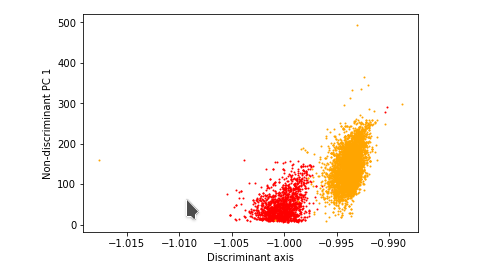

# Multivariate Linear Regression
## What is it?
MLR measures the degree how variables are linearly related to each other
- the relation is linear due to a correlation between them
once MLR is applied to a dataset it can also predict the behaviour of a variable

## When to use it?
2 sets of data when you have a limited data set
## How to use it?
### step 1: Select the features
First, you need to select that one feature that drive the multivariate regression. this is the feature that is highly responsible for the change in your dependent variable.
### step 2: Normalize the feature
Now that we have our selected features, it is time to scale them in a certain range(preferable 0-1) so that analysing them gets a bit easy. 
<br>
to change the value of each feature, we can use:
### step 3: Select loss function and formulate a hypothesis
A formulated hypothesis is nothing but a predicted value of the response variable and is denoted by h(x).
<br>
A loss function is a calculated loss whe the hypothesis predicts a wrong value. a cost unction is a cost handled for those wrongly predicting hypothesis
### step 4: Minimize the cost and loss function
Both cost function and loss function are dependednt on each other. Hence, in order to minimize both of them, minimization algorithms can be run over the datasets. these algorithms then adjust the parameters of the hypothesis.
<br> 
one of the minimization algorithms that can be used it the gradient descent algorithm
### step 5: Test the hypothesis
The formulated hypothesis is then tested with a test set to check its accuracy and correctness

# Principal Component Regression PCR 
## What is it?
PCR is a regression technique that servers the same goals as standard linear regression - model the relationship between a target variable and the predictor variables. The difference is that PCR uses the __principal components as the predictor variables__ for regression analysis instead of the original features.

The idea is that the smaller number of principal components represents __most of the variability__ in the data and(presumptively) the __relationship with the target variable__. therefor, instead of using all the original features for regression, we only utilize a __subset__ of the principal components.
## When to use it?
2 data sets with many features
## How to use it?
### step 1:
Apply PCA to generate principal components from the predictor variables, with the number of principal components matching the number of original features __P__
### step 2:
keep the first k principal components that explain most of the variance (where k < p), where k is determined by cross-validation
### step 3:
fit a linear regression model (using ordinary least squares) on these k principal components.





# Partial Least Squares Regression (PLS regression)
https://en.wikipedia.org/wiki/Partial_least_squares_regression
## What is it?
PLS regression is a statistical method that bears relation to PCR; instead of finding hyperplanes of maximum variance between the respeonse and independent variables, it finds a linear regression model by projecting the predicted variables and the observable variables to a new space. Because both the X and Y data are projected to new spaces, the PLS family of methods are known as bilinear factor models. PLS-DA is a variant used when the Y is categorical.
<br><br>
PLS is used to find the fundamental relations between 2 matrices X and Y i.e. a latent variable approach to modeling the covaraince structures in these two spaces. A PLS model will try to find the multidimensional direction in the X space that explains the maximum multidimensional variance direction in the Y space. 

## When to use it?
PLS regression in particularly is suited when the matrix of predictors has more variables than observations and when there is multicollinearity among X values. By contrast, standard regression will fail in these cases
## How to use it?

# Singular Value Decomposition (SVD)

## What is it?
SVD aims at finding two rotation matrices __U__ and __V__ for two data sets __X__ and __Y__, such that the matrix of inner products of two (__XU__)t __YV__ after rotation is diagonal.

SVD rotates both data sets such that the two first components have the highest variance, the two second components have the second highest covariance, and so on. likewise, where the covariance between any two non-equal components is zero in PCA, any two components from either data set, which have unequal indices have zero covariance in SVD. in this context, the SVD sometimes explicitely called (Maximum covariance Analysis).

In the above sense, the SVD applies to cross-covariance matrices (covariance matrices from the inner product of two data sets). However, every matrix could be considered or even written as a cross-covariance matrix of some two data matrices, and the SVD is thus not restricted to actual ones, but can be used to write any matrix as two 'rotation' (singular vector) matrices and a diagonal matrix of singular values:

𝐒=𝐔𝚲𝐕𝑇
## When to use it?
## How to use it?

# MCA
## What is it?
## When to use it?
## How to use it?

# CCA
https://en.wikipedia.org/wiki/Canonical_correlation
## What is it?
It is a way of inferring information from cross-covariance matrices. if we have two vectors x and y of random variables, and there are correlations among the variables, then CCA will find linear combinations of X and Y which have maximum correlation with each other.
## When to use it?
## How to use it?